In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/jazmingutierrez/DEC2023 Instacart Basket Analysis'

In [3]:
df_all_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_final.pkl'))

In [4]:
# mapping department with names 
department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages', 
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat, seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

In [5]:
#adding coulumn with department
df_all_final['department'] = df_all_final['department_id'].map(department_mapping)

In [6]:
pd.set_option('display.max_columns', None)
df_all_final.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spender,spender_flag,average_spend,Customer_frequency,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,merged,Region,Exclusion flag,Age Group,Income Category,Dependants Category,Customer Family Type,Customer Age Type,Customer Age Typr,department
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer,Young Adult,Lowest Income,Dependants,"Married, Dependants, Lowest Income","Married, Young Adult",nan,beverages
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer,Young Adult,Lowest Income,Dependants,"Married, Dependants, Lowest Income","Married, Young Adult",nan,beverages
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Most orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer,Young Adult,Lowest Income,Dependants,"Married, Dependants, Lowest Income","Married, Young Adult",nan,beverages
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer,Young Adult,Lowest Income,Dependants,"Married, Dependants, Lowest Income","Married, Young Adult",nan,beverages
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer,Young Adult,Lowest Income,Dependants,"Married, Dependants, Lowest Income","Married, Young Adult",nan,beverages


[Text(0, 0.5, 'Number of orders'), Text(0.5, 1.0, 'Price Range')]

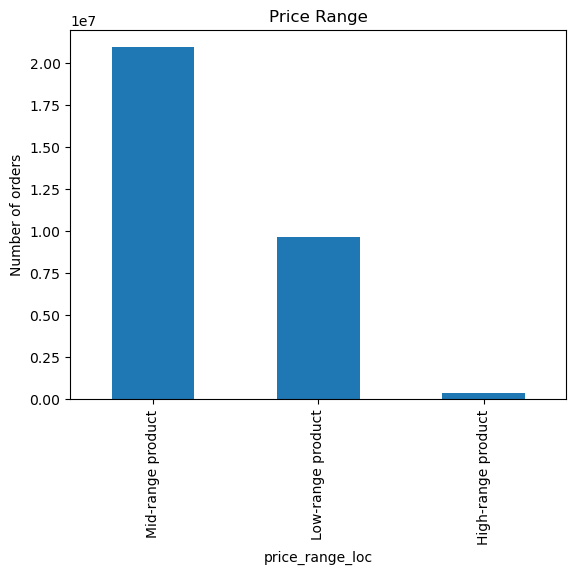

In [7]:
#bar plot of price range loc 
bar= df_all_final['price_range_loc'].value_counts().plot.bar()
bar.set( ylabel= 'Number of orders', title='Price Range')

In [8]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range.png'))

[Text(0, 0.5, 'Number of Orders'),
 Text(0.5, 1.0, 'Number of Orders by Department')]

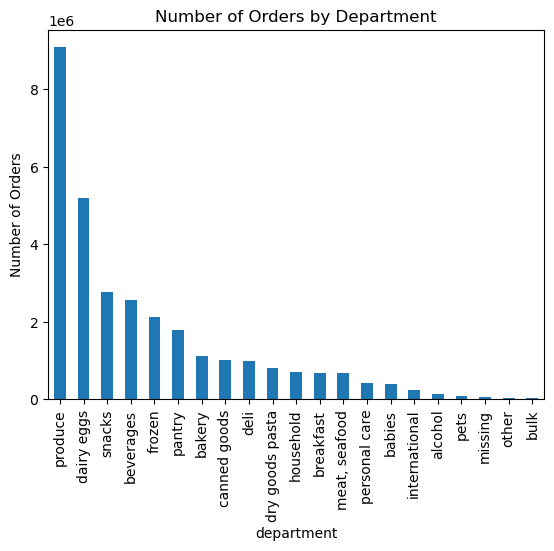

In [9]:
#bar plt of department comparing the amount of orders
bar_dep= df_all_final['department'].value_counts().plot.bar()
bar_dep.set( ylabel= 'Number of Orders', title='Number of Orders by Department')

In [10]:
bar_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department.png'))

[Text(0, 0.5, 'Orders'), Text(0.5, 1.0, 'Customer Loyalty')]

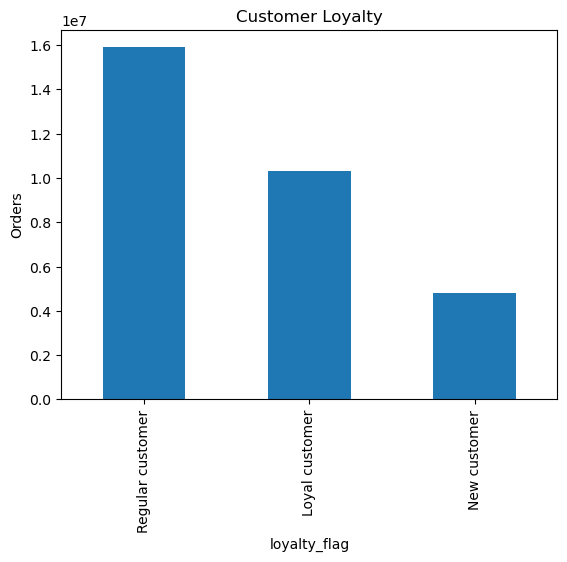

In [12]:
# Bar plot of loyalty_flag and amount of orders
bar_loyalty= df_all_final['loyalty_flag'].value_counts().plot.bar()
bar_loyalty.set(ylabel= 'Orders',  title='Customer Loyalty')

In [13]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Days Since prior Order')]

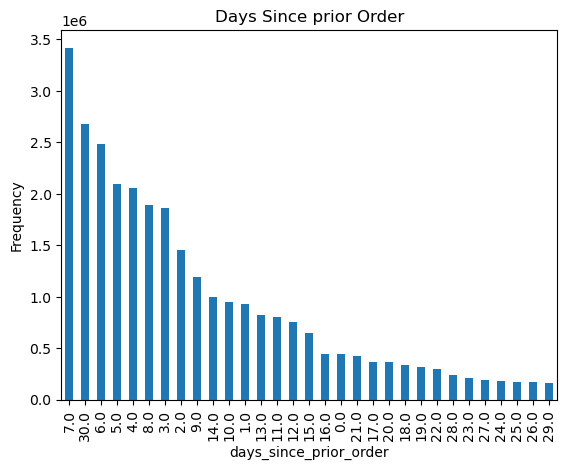

In [14]:
# bar plot of days_since_prior_order and frequency 
bar_frequency= df_all_final['days_since_prior_order'].value_counts().plot.bar()
bar_frequency.set(ylabel= 'Frequency',  title='Days Since prior Order')

In [15]:
bar_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_frequency.png'))

In [17]:
# Export  df_all_final

df_all_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_final_clean.pkl'))